In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
loan = pd.read_csv("dataset/loan_train.csv", sep=";")

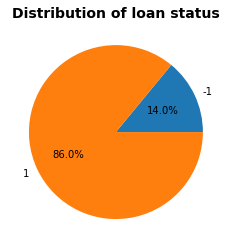

In [14]:
perc_status_neg = len(loan.loc[loan["status"] == -1]) / len(loan) * 100
perc_status_pos = len(loan.loc[loan["status"] == 1]) / len(loan) * 100
plt.title("Distribution of loan status", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.pie([perc_status_neg, perc_status_pos], labels=["-1", "1"], autopct='%.1f%%')
plt.savefig("new_stats/loan_status_dist.png")

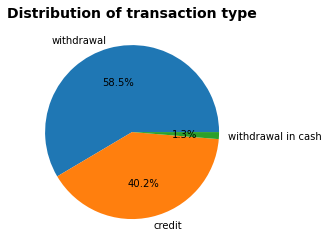

In [36]:
trans = pd.read_csv("dataset/trans_train.csv", sep=";")
total = len(trans)
percs = np.array([trans["type"].value_counts().values / total] * 100)[0]
plt.title("Distribution of transaction type", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.pie(percs, labels=trans["type"].value_counts().keys(), autopct='%.1f%%')
plt.savefig("new_stats/trans_type_dist.png")